In [1]:
!pip install asteca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.7 MB/s eta 0:00:00


In [2]:
import asteca
print(asteca.__version__)

0.6.1


In [55]:
import pandas as pd
import asteca
import numpy as np

# Load the data file as a pandas DataFrame
df = pd.read_csv("/content/M67_GaiaDR3_m15arcmin.csv")

# Calculate e_Gmag from FG and e_FG
# Gmag = -2.5 * log10(FG)
# d(Gmag)/d(FG) = -2.5 / (FG * ln(10))
# e_Gmag = |d(Gmag)/d(FG)| * e_FG
df['e_Gmag'] = (2.5 / (df["FG"] * np.log(10))) * df["e_FG"]

# Create a Cluster object using the columns in the loaded data file
my_field = asteca.Cluster(
    ra=df["RA_ICRS"],
    dec=df["DE_ICRS"],
    pmra=df["pmRA"],
    pmde=df["pmDE"],
    plx=df["Plx"],
    e_pmra=df["e_pmRA"],
    e_pmde=df["e_pmDE"],
    e_plx=df["e_Plx"],
)

# Assign magnitude and its error as attributes after initialization
my_field.mag = df["Gmag"]
my_field.e_mag = df["e_Gmag"]



Instantiating cluster
Cluster object generated


In [56]:
print(df.columns)

Index(['RA_ICRS', 'DE_ICRS', 'Source', 'e_RA_ICRS', 'e_DE_ICRS', 'Plx',
       'e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'FG', 'e_FG',
       'Gmag', 'FBP', 'e_FBP', 'BPmag', 'FRP', 'e_FRP', 'RPmag', 'BP-RP', 'RV',
       'e_RV', 'Vbroad', 'GRVSmag', 'QSO', 'Gal', 'NSS', 'XPcont', 'XPsamp',
       'RVS', 'EpochPh', 'EpochRV', 'MCMCGSP', 'MCMCMSC', 'And', 'Teff',
       'logg', '[Fe/H]', 'Dist', 'A0', 'HIP', 'PS1', 'SDSS13', 'SKYM2', 'TYC2',
       'URAT1', 'AllWISE', 'APASS9', 'GSC23', 'RAVE5', '2MASS', 'RAVE6',
       'RAJ2000', 'DEJ2000', 'e_Gmag'],
      dtype='object')


In [57]:
# Will apply the default `knn_5d` algorithm on `(ra, dec, pmra, pmde, plx)` data
my_field.get_center()

# Will apply the `kde_2d` algorithm on `(ra, dec)` data
my_field.get_center('kde_2d')

# Will apply the `kde_2d` algorithm on `(pmra, pmde)` data
my_field.get_center('kde_2d', data_2d='pms')


Center coordinates found

Center coordinates found

Center coordinates found


In [58]:
my_field.radec_c  # (ra, dec) center coordinates
my_field.pms_c    # proper motions center coordinates
my_field.plx_c    # parallax center value

np.float64(0.9273)

In [59]:
my_field.radec_c  # (ra, dec) center coordinates

(np.float64(132.83871882195444), np.float64(11.580444650044141))

In [60]:
my_field.pms_c    # proper motions center coordinates

(np.float64(-4.379858585858585), np.float64(-2.764787878787878))

In [61]:
my_field.plx_c    # parallax center value

np.float64(0.9273)

In [62]:
my_field.radius = 0.05 # Manually chosen based on TOPCAT and literature

In [63]:
# Will apply the default `ripley` algorithm on `(ra, dec, pmra, pmde, plx)` data
# This assumes that the `get_center()` method was already applied or the
# (pms_c, plx_c) center values were stored as attributes by the user
my_field.get_nmembers()

# Will apply the `density` algorithm on `(ra, dec)` data. This also assumes that
# the `get_center()` method was applied, and it also requires a `radius`
# attribute to be set in the `my_field` object
my_field.radius = 0.05
my_field.get_nmembers('density')


Number of members estimated

Number of members estimated


/usr/local/lib/python3.12/dist-packages/asteca/cluster.py:427: UserWarning: The estimated number of cluster members is <25
  warnings.warn(


In [13]:
my_field.N_cluster # The resulting number are much less than to literture so i consider 200 and manullay enter

76

In [36]:
# Ensure N_cluster is set before initializing Membership
# Reverting N_cluster to a smaller value (20) based on 'density' method warning to avoid 'zero-size array' error
my_field.N_cluster = 200

# Define a `membership` object
memb = asteca.Membership(my_field)


Membership object generated


In [64]:
# Define a `membership` object
memb = asteca.Membership(my_field)


Membership object generated


In [65]:
# Run `fastmp` method
probs_fastmp = memb.fastmp()

# Run `bayesian` method
probs_bayes = memb.bayesian()


Running fastMP

Running Bayesian DA


/usr/local/lib/python3.12/dist-packages/asteca/modules/cluster_priv.py:297: UserWarning: Could not estimate a better PMs center value
  warnings.warn("Could not estimate a better PMs center value")


In [67]:
import asteca
import pandas as pd
import matplotlib.pyplot as plt

field_df = pd.read_csv("/content/M67_GaiaDR3_m15arcmin.csv")

my_field = asteca.Cluster(
    ra=field_df["RA_ICRS"],
    dec=field_df["DE_ICRS"],
    pmra=field_df["pmRA"],
    pmde=field_df["pmDE"],
    plx=field_df["Plx"],
    e_pmra=field_df["e_pmRA"],
    e_pmde=field_df["e_pmDE"],
    e_plx=field_df["e_Plx"],
    verbose = 2
)


Instantiating cluster
Columns read   : RA, DEC, Plx, pmRA, pmDE
N_stars        : 50
N_clust_min    : 25
N_clust_max    : 5000
Cluster object generated


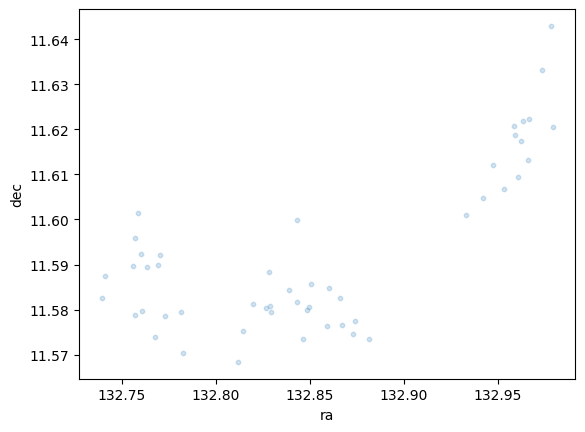

In [68]:
plt.scatter(my_field.ra, my_field.dec, alpha=.2, s=10)
plt.xlabel("ra")
plt.ylabel("dec");

In [69]:
# Estimate the cluster's center coordinates, use the default algorithm
my_field.get_center()

# Estimate the number of cluster members, use the default algorithm
my_field.get_nmembers()


Center coordinates found
radec_c        : (132.8270, 11.5846)
pms_c          : (-10.411, -2.637)
plx_c          : 0.927

Number of members estimated
N_cluster      : 25


/usr/local/lib/python3.12/dist-packages/asteca/cluster.py:427: UserWarning: The estimated number of cluster members is <25
  warnings.warn(


In [70]:
# Define a `membership` object
memb = asteca.Membership(my_field, verbose=2)


Membership object generated
N_cluster      : 25
Random seed    : None


In [73]:
# Run `fastmp` method
probs_fastmp = memb.fastmp()



Running fastMP
lonlat_c       : (215.9272, 31.8076)
pms_c          : (-10.411, -2.637)
plx_c          : 0.927
fixed_centers  : False
N_cluster      : 25
N_resample     : 1000
Convergence reached at 52 runs


/usr/local/lib/python3.12/dist-packages/asteca/modules/cluster_priv.py:297: UserWarning: Could not estimate a better PMs center value
  warnings.warn("Could not estimate a better PMs center value")


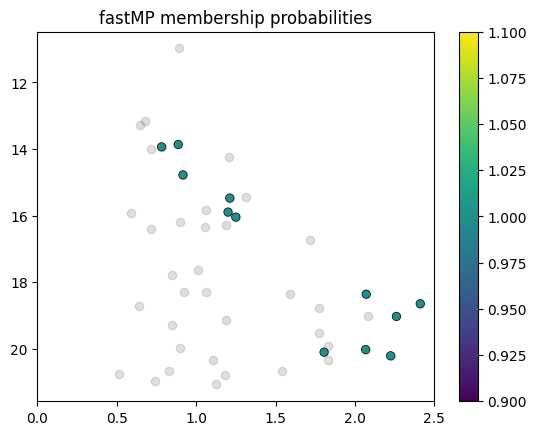

In [74]:

plt.title("fastMP membership probabilities")
plt.scatter(field_df['BP-RP'], field_df['Gmag'], c='grey', alpha=.25)
msk = probs_fastmp > 0.5
plt.scatter(field_df['BP-RP'][msk], field_df['Gmag'][msk], c=probs_fastmp[msk], ec='k', lw=.5)
plt.gca().invert_yaxis()
plt.xlim(0, 2.5)
plt.colorbar();

In [76]:
import numpy as np

# Calculate e_Gmag from FG and e_FG for field_df
# Gmag = -2.5 * log10(FG)
# d(Gmag)/d(FG) = -2.5 / (FG * ln(10))
# e_Gmag = |d(Gmag)/d(FG)| * e_FG
field_df['e_Gmag'] = (2.5 / (field_df["FG"] * np.log(10))) * field_df["e_FG"]

# Calculate e_BPmag and e_RPmag from FBP, e_FBP, FRP, e_FRP for field_df
field_df['e_BPmag'] = (2.5 / (field_df["FBP"] * np.log(10))) * field_df["e_FBP"]
field_df['e_RPmag'] = (2.5 / (field_df["FRP"] * np.log(10))) * field_df["e_FRP"]

# Calculate e_BP-RP as the error of the difference of two independent magnitudes
field_df['e_BP-RP'] = np.sqrt(field_df['e_BPmag']**2 + field_df['e_RPmag']**2)

my_field = asteca.Cluster(
    ra=field_df["RA_ICRS"],
    dec=field_df["DE_ICRS"],
    magnitude=field_df["Gmag"],
    e_mag=field_df["e_Gmag"],
    color=field_df["BP-RP"],
    e_color=field_df["e_BP-RP"],
    verbose=2
)


Instantiating cluster
Columns read   : RA, DEC, Magnitude, e_mag, Color, e_color
N_stars        : 50
N_clust_min    : 25
N_clust_max    : 5000
Cluster object generated


In [77]:
# Estimate the cluster's center coordinates, using the `kde_2d` algorithm and (RA, DEC) data
my_field.get_center("kde_2d")

# Add a radius attribute manually
my_field.radius = 0.09  # in degrees

# Estimate the number of cluster members, using the `density` algorithm
my_field.get_nmembers("density")


Center coordinates found
radec_c        : (132.8387, 11.5804)

Number of members estimated
N_cluster      : 111


In [78]:
# Define a `membership` object
memb = asteca.Membership(my_field, verbose=2)

# Run `bayesian` method


Membership object generated
N_cluster      : 111
Random seed    : None


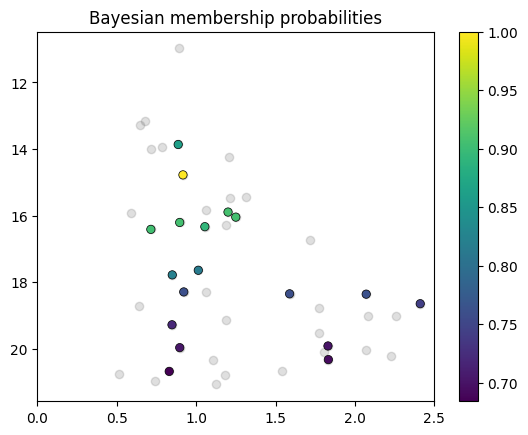

In [79]:
plt.title("Bayesian membership probabilities")
plt.scatter(field_df['BP-RP'], field_df['Gmag'], c='grey', alpha=.25)
msk = probs_bayes > 0.5
plt.scatter(field_df['BP-RP'][msk], field_df['Gmag'][msk], c=probs_bayes[msk], ec='k', lw=.5)
plt.gca().invert_yaxis()
plt.xlim(0, 2.5)
plt.colorbar();


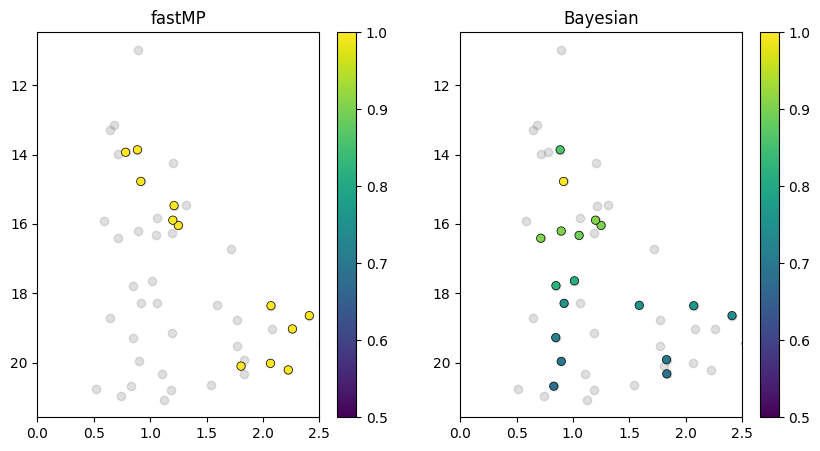

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# fastMP membership
ax1.set_title("fastMP")
ax1.scatter(field_df['BP-RP'], field_df['Gmag'], c='grey', alpha=.25)
msk = probs_fastmp > 0.5
im1= ax1.scatter(field_df['BP-RP'][msk], field_df['Gmag'][msk], c=probs_fastmp[msk], ec='k', lw=.5, vmin=0.5, vmax=1)
ax1.invert_yaxis()
ax1.set_xlim(0, 2.5)
fig.colorbar(im1, ax=ax1)

# Bayesian memberhsip
ax2.set_title("Bayesian")
ax2.scatter(field_df['BP-RP'], field_df['Gmag'], c='grey', alpha=.25)
msk = probs_bayes > 0.5
im2 = ax2.scatter(field_df['BP-RP'][msk], field_df['Gmag'][msk], c=probs_bayes[msk], ec='k', lw=.5, vmin=0.5, vmax=1)
ax2.invert_yaxis()
ax2.set_xlim(0, 2.5)
fig.colorbar(im2, ax=ax2);